# Predicting University Admission with Linear Regression, Decision Trees, and Random Forest Models

## Project Description

This project develops several model that predict the liklihood of accpetance into a graduate program at a university. The specific models that I train and evaluate in this project are the following: a linear regression model, a decision tree classifier, and a random forest model. This project is a learning exercise, and is taken from Ryan Ahmed's course, "University Admission Prediction Using Multiple Linear Regression".

## Research Problems

The primary problem is the following: Can we develop an accurate regression model for predicting the liklihood of acceptance into a graduate program at a specific university?

However, in order to answer the *primary reserach problem* we must answer several secondary questions that include:
(A) What kind of model is best? (B) Which features of the dataset serve as the best predictors? and (C) What evaluation metrics will be used? (D) Is the available dataset appropriate for our purpose?

Note that the possible predictors available are the set of features concerning a particular student's (1) academic profile, and (2) strength of her application materials. These features include:
1. GRE score (a numeric score out of 340)
2. TOEFL score (a numeric score out of 120)
3. The university ranking (a numeric score out of 5)
4. Statement of purpose - i.e., the "SOP" document
5. The strength of the applicant's letter of recommendation (LORs) (a score out of 5)
6. Undergraduate GPA (a numveric score out of 10)
7. Research experience (a binary score of either 1 or 0, where 1 represents *having research experience* and 0 represents a *lack of research experience*).

## Methodology

This project leverages a plurality of data science tools and techniques. The project proceeds as follows.
1. Import libraries and modules
2. Import data
3. Perform exploratory data analysis
4. Clean and process the data
5. Build, train, and evaluate a linear regression model
6. Build, train, and evaluate a decision tree model
7. Build, train, and evaluate a random forest model
8. Review several important model KPIs and metrics
9. Apply KPIs to the linear regression model I created

## Acknowledgements

Special thanks to Ryan Ahmed for his guided course, "University Admission Prediction Using Multiple Linear Regression".

I want to also acknowledge Mohan Acharya for compiling the raw data that was used in this project. The original dataset can be found here: https://www.kaggle.com/mohansacharya/graduate-admissions

## 1. Importing Libraries and Modules

In [3]:
# Import libraries and modules
!pip install tensorflow

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


print("Libraries and modules installed.")

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=33a8b891c1bbd21c6475e8f993af30c4b53bc980a2e3d24e89ba00e50065564d
  Stored in directory: c:\users\adams\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Libraries and modules installed.


## 2. Importing Data

In [4]:
# Import the primary dataset and set it to a variable
admission = "C:/Users/adams/Desktop/Data Science/Datasets/Admission.csv"

# Create a dataframe
df_admission = pd.read_csv(admission)

In [5]:
# Display the first five rows
df_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Display the shape of the data frame
df_admission.shape

(400, 9)

**Remark 1:** The data frame, *df_admission*, contains the 7 features and the target variable, *Chance of Admit*. Note that the target variable is the variable that we want to predict.

**Remark 2:** The column, *Serial No.* is not needed for this project. Let us drop it.

In [7]:
# Drop 'Serial No.' column
df_admission.drop("Serial No.", axis = 1, inplace = True)

# Check the first five rows
df_admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## 3. Exploratory Data Analysis and Data Visualization

### 3.1 Perform Exploratory Data Analysis

#### 3.1.1 Missing Values

In [8]:
# check for missing values
df_admission.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### 3.1.2 Data Types

In [9]:
# Check the info method to examine the types of data 
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


**Remark:** We have 400 entries, and the values are numerical (floats and integers).

#### 3.1.3 Summary Statistics

In [10]:
# Check the summary statistics
df_admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### 3.1.4 Drill Down

In [11]:
# Group the universities by their rankings
df_university = df_admission.groupby(by = "University Rating").mean()

# Display df_university
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


**Observation:** We can see that students that went to the highest rated universities (Rank 5) have higher scores for GRE, TOEFL, SOP, LOR, GPA, and Research. Moreover, students from universities with a rating of 5 have higher chances of admittance. This is not surprising, and is in line with my intution. 

### 3.2 Data Visualization

#### 3.2.1 Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F52CCEDF0>,
      dtype=object)

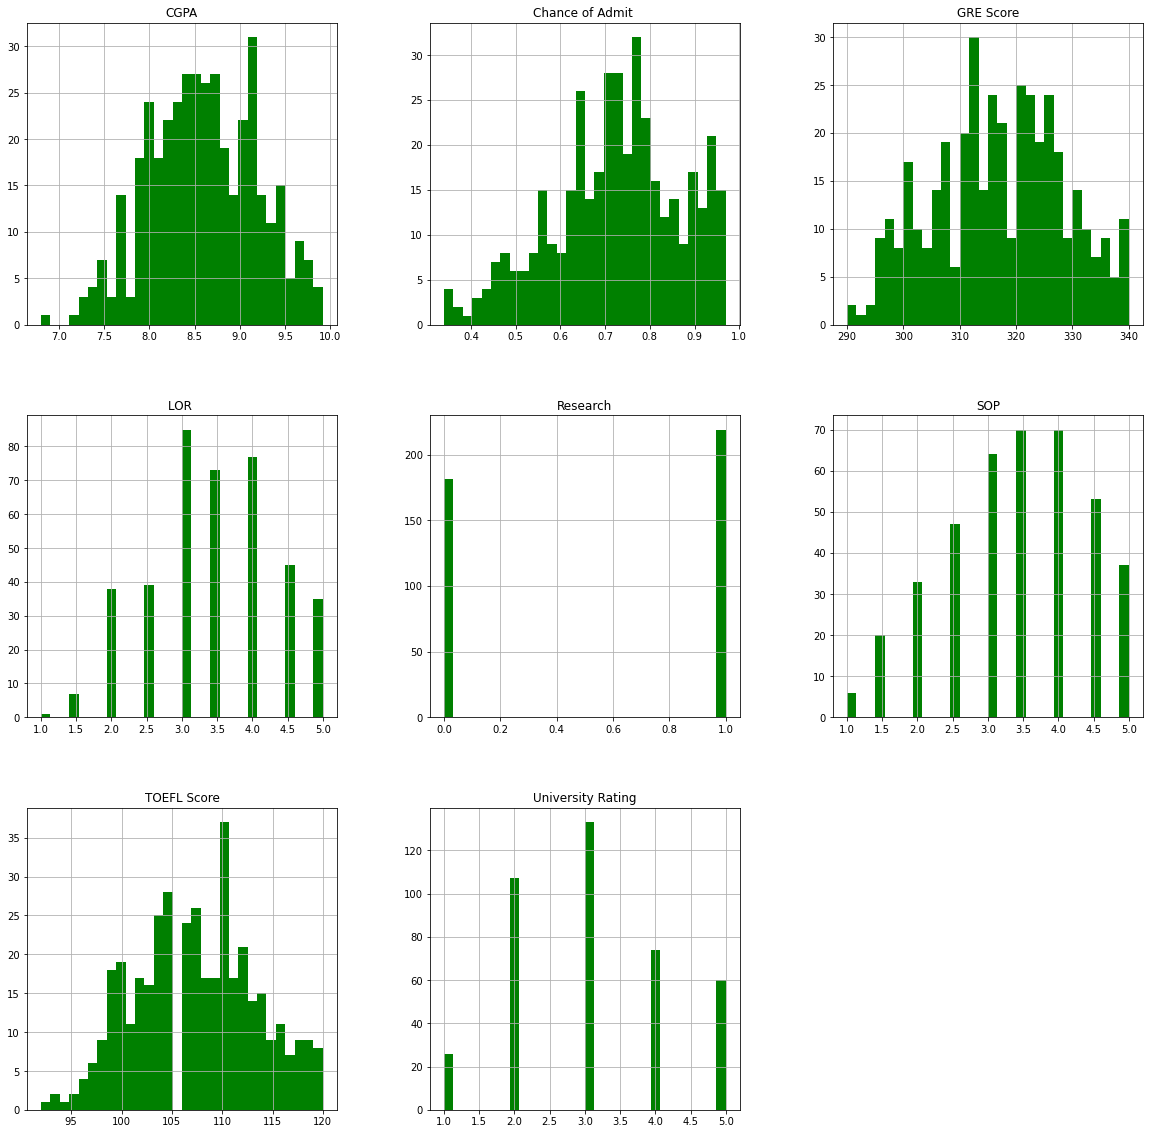

In [12]:
# Create and display histograms of the data
df_admission.hist(bins = 30, figsize = (20, 20), color = "green")

**Some Observations:** One interesting observation is that the majority of students admitted have research experience. Another interesting point to keep in mind is that the majority of addmitted students come from universities with a mid-level rating of '3'.

#### 3.2.2 Seaborn Pairplot

Creating a pairplot will enable us to examine the relationships that hold between each feature or variable.

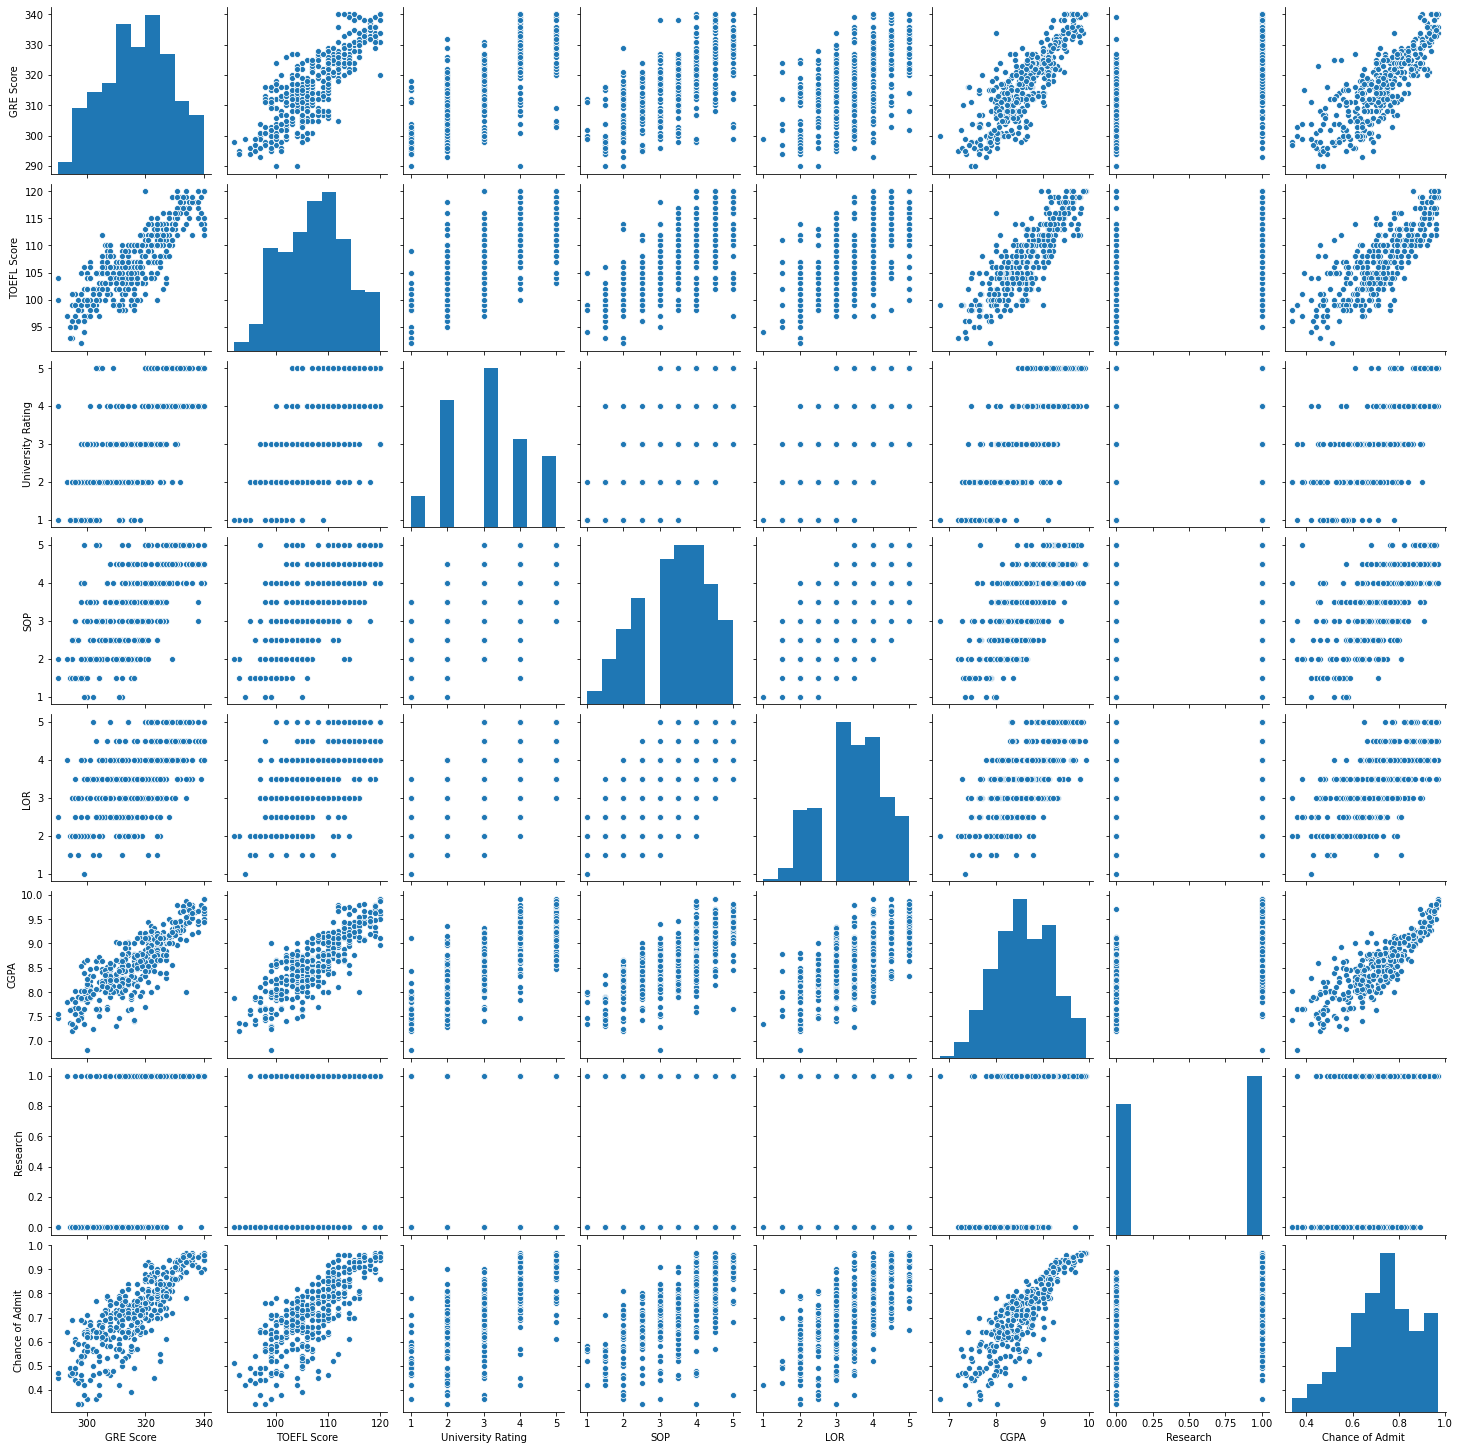

In [13]:
# Create the pairplot
sns.pairplot(df_admission)

**Some Observations:** We see a positive correlation between GRE Score and Chance of Admit. There is also a positive correlation between TOEFL Score and Chance of Admit. Similarly with GPA and Chance of Admit. Also note that when the strength of University Rating, LOR, and SOP goes up, so does the chance of admission. Finally, we can see that if a student has research experience, then her chance of admittance goes up.

#### 3.2.3 Correlation

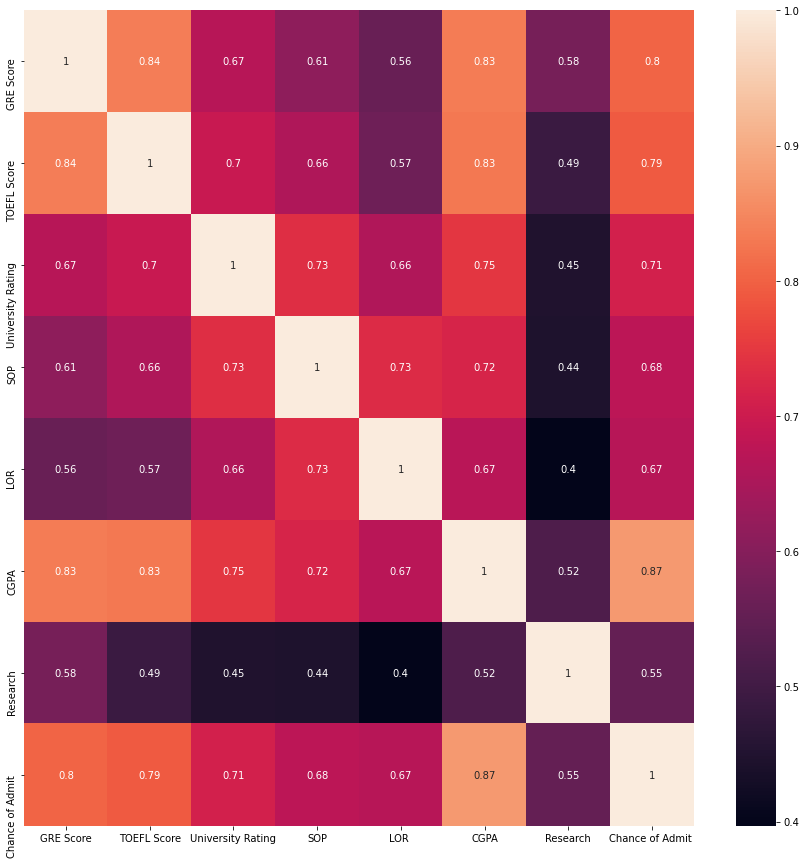

In [14]:
# Plot a heat map of the correlations
corr_matrix = df_admission.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True) # set annot to True to see the numbers on the plot
plt.show()

## 4. Preparing the Data

### 4.1 Carve the Data into Two Seta: An Input Features Set and an Output/Target Set

In [15]:
# Check the columns
df_admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
# Carve the data into a set of input features, 'X'
X = df_admission.drop(columns = ["Chance of Admit "])

# Display the first five rows of X
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [17]:
# Check the shape
X.shape

(400, 7)

In [18]:
# Carve the data into a set of ouputs - i.e., the target variable, 'y'
y = df_admission["Chance of Admit "]

# Display first five rows of y
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [19]:
# Check the shape
y.shape

(400,)

### 4.2 Convert the Sets into NumPy Arrays

In [20]:
# Convert to NumPy Arrays
X = np.array(X)
y = np.array(y)

In [21]:
# Reshape 'y' so that the shape reads '(400, 1)' instead of '(400, )'
y = y.reshape(-1, 1)

# Check the shape of y
y.shape

(400, 1)

In [22]:
# Check the shape of X
X.shape

(400, 7)

### 4.3 Data Standardization

Before I train the model, I must scale the data so that the values share a similar range. This will help in the development of machine learning models by ensuring that there is no bias toward features with higher values simply because the range of that data is higher.

In [23]:
# Import StandardScaler and MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
# Instantiate a scaler object from the class
scaler_x = StandardScaler()

# Apply the fit_transform method to the object to scale the data
X = scaler_x.fit_transform(X) # pass it the data, X, to get the new scaled value, X

In [25]:
# Scale the data for y
# Instantiate a scaler object from the class
scaler_y = StandardScaler()

# Apply the fit_transform method to the object to scale the data
y = scaler_y.fit_transform(y) # pass it the output data, y, to get the new scaled value, y

### 4.4 Split the Data into Training and Testing Sets

In [26]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [27]:
# Apply train_test_split to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

## 5. Construct, Train, and Evaluate a Linear Regression Model

Least squares fitting is employed to identify the best fitted line for the data points. That is to say, the sum of the squares of the residual points (i.e., the summ of the squares of the distances between the actual points and the predicted value points on the trend line) are used to determine the best fit line. By using the least squares method we can determine the coefficients *m* and *b*. Recall the equation y = b + m * x in simple linear regression, wher y is the dependent variable, x is the independent variable, m is the slope, and b is the y-intercept.

### 5.1 Import Linear Regression and Evaluation Metrics

In [28]:
# Import linear regression
from sklearn.linear_model import LinearRegression

In [29]:
# Import Evaluation metrics
from sklearn.metrics import mean_squared_error, accuracy_score

### 5.2 Train and Fit a Linear Regression Model

In [30]:
# Instantiate a linear regression object
LinearRegression_model = LinearRegression()

# Apply the fit method to the object and pass it the training data
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

### 5.3 Evaluate the Linear Regression Model

In [31]:
# Retrieve an accuracy score for the model by using the testing data
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)

# Display the score
accuracy_LinearRegression

0.8327865167089665

**Remark:** We were able to achieve an accuracy score of 83.28%.

## 6. Train and Evaluate a Neural Network Model for Regression

I will create the artificial neural network model, calculate its error, go back and optimize the weights in the model, and repeat the process until an optimal model is achieved.

Note: I will use TensorFlow and the Keras API.

In [32]:
# Import tensor flow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
# Define the model
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [34]:
# Compile the model
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [35]:
# Fit the model to the data
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6651 - val_loss: 0.2722
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4312 - val_loss: 0.1871
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4007 - val_loss: 0.1863
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3112 - val_loss: 0.2141
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3016 - val_loss: 0.1668
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2789 - val_loss: 0.1767
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2738 - val_loss: 0.1851
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.2840 - val_loss: 0.1794
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2708 - val_loss: 0.1807
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2959 - val_loss: 0.1586
Epoch 11/

In [36]:
# Determine the accuracy
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

2/2 [==============================] - 0s 500us/step - loss: 0.2143
Accuracy : 0.7857494354248047


**Remark:** We achieved an accuracy score of 78.57%.

In [37]:
# Get training loss of epochs
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

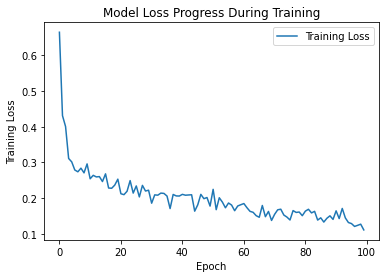

In [38]:
# plot the training loss of epochs
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## 7. Train and Evaluate a Decision Tree

In [39]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Create the model and fit it to the training data
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
# Evaluate the model
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.6076950532539481

**Remark:** The accuracy of the decision tree is only 60.77%, which is much lower than our other models.

## 8. Build and Evaluate a Random Forest Model

In [41]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Build a Random Forest model and fit it to the training data
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

<ipython-input-41-84d42875adc0>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [42]:
# Evaluate the model
accuracy_rf = RandomForest_model.score(X_test, y_test)
accuracy_rf

0.7807613859252108

**Remark::** The random forest model is more accurate than the standard decision tree that I build earlier.

## 9. Model KPIs

Note that it is important to evaluate a model once it has been fit to the data. Assessing the model involves comparing the predicted values with the actual, true values.

**Note:** The following cells contain descriptions of different model evaluation metrics. The descriptions are quotes taken from Ryan Ahmed's course, "University Admission Prediction Using Multiple Linear Regression".

**Mean Absolute Error:** this is obtained by "calculating the absolute distance between the model predictions and the actual (true) values...it is the sum of the average magnitude of error generated by the regression model...[and] is calculated following these steps: 1. calculate the residual of every data point, 2. calculate the absolute value (to get rid of the sign), 3. calculate the average of all the residuals...if the MAE is zero, this indicates the model predictions are perfect."

**Root Mean Square Error (RMSE):** "represents the standard deviation of the residuals (i.e.: differences between the model predictions and the true values (training data))...can be easily interpreted compared to MSE because RMSE units match the units of the output. RMSE provides an estimate of how large the residuals are being dispersed. The RMSE is calculated by following these steps: 1. calculate the residual for every data point, 2. calculate the squared values of the residuals, 3. calculate the average of the squared residuals, 4. obtain the square root of the result."

**R-square (R^2) - coefficient of determination:** "R-square...represents the proportion of variance (of y) that has been explained by the independent variables in the model. If R^2 = 80, this means that 80% of the increase in University Admission is due to GRE scores" (assuming a GRE is the predictor and we are using a simple linear regression model).
"R-square represents the proportion of variance (y) that has been explained by the independent variable (X) in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. Best possible score is 1.0."

**Note:** "One limitation of R^2 is that it increases by adding independent variables to the model which is misleading since some added variables might be useless with minimal significance. Adjusted R^2 can overcome this by adding a penalty if we make an attempt to add independent variables that do not improve the model. Adjusted R^2 is a modified version of R^2 and takes into account the number of predictors in the model. If useless predictors are added to the model, R^2 will decrease. If useful predictors are added to the model, R^2 will increase."

### 9.1 Example: Calculate KPIs for The Linear Regression Model

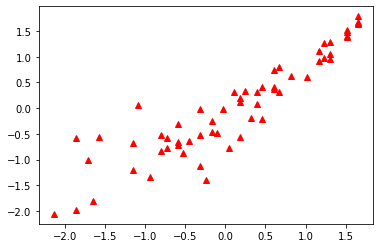

In [43]:
# Take the LinearRegression_model, apply the 'predict' method, and feed X_test to generate y predictions
y_predict = LinearRegression_model.predict(X_test)

# Plot the predictions versus the actual values, y_test
plt.plot(y_test, y_predict, "^", color = "red")

In [45]:
# Scale the data back to the original units to make sense of the data
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

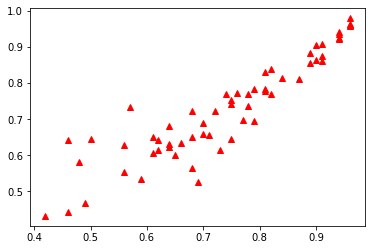

In [46]:
# Create the plot again and evaluate the model
plt.plot(y_test_orig, y_predict_orig, "^", color = "red")

In [47]:
# obtain length of testing data for use in getting r-squared
k = X_test.shape[1]
n = len(X_test)
n

60

In [48]:
# Import evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


# Get the KPIs
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.06 
MSE = 0.0035917270418154785 
MAE = 0.04056181007719422 
R2 = 0.8327865167089665 
Adjusted R2 = 0.8102770093428658
